In [203]:
# 필요한 패키지 불러오기
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [159]:
# 파일 불러오기
data = pd.read_excel("./dataset/activity_sample.xlsx", sheet_name="in", index_col=0)

In [160]:
data.head()

,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,grade,...,day_23_status,day_24_status,day_25_status,day_26_status,day_27_status,day_28_status,day_29_status,day_30_status,day_31_status,change_date
6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,ViewEvent,Viewed,DigitalResource,2022-09-14 23:28:53.150,M,5,...,11,11,44,44,44,44,44,44,999,25
6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:09.481,M,5,...,11,11,44,44,44,44,44,44,999,25
6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:09.604,M,5,...,11,11,44,44,44,44,44,44,999,25
6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:43.752,M,5,...,11,11,44,44,44,44,44,44,999,25
6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:43.883,M,5,...,11,11,44,44,44,44,44,44,999,25


In [161]:
# 결측치 확인
data.isnull().sum()  # 결측치 없음

userid                 0
learning_seq           0
mcode                  0
learning_action_seq    0
event_type             0
action                 0
object_type            0
timestamp              0
gender                 0
grade                  0
memberstatus           0
memberstatus_change    0
day_01_status          0
day_02_status          0
day_03_status          0
day_04_status          0
day_05_status          0
day_06_status          0
day_07_status          0
day_08_status          0
day_09_status          0
day_10_status          0
day_11_status          0
day_12_status          0
day_13_status          0
day_14_status          0
day_15_status          0
day_16_status          0
day_17_status          0
day_18_status          0
day_19_status          0
day_20_status          0
day_21_status          0
day_22_status          0
day_23_status          0
day_24_status          0
day_25_status          0
day_26_status          0
day_27_status          0
day_28_status          0


In [162]:
data.describe()

,learning_seq,learning_action_seq,timestamp,grade,memberstatus,day_13_status,day_14_status,day_15_status,day_16_status,day_17_status,...,day_23_status,day_24_status,day_25_status,day_26_status,day_27_status,day_28_status,day_29_status,day_30_status,day_31_status,change_date
count,6476.00000,6476.000000,6476,6476.0,6476.0,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,...,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.0,6476.0,6476.000000
mean,4.92202,16.870290,2022-09-11 06:43:13.738381824,5.0,44.0,11.034435,11.034435,11.034435,13.106084,13.106084,...,27.420939,32.353613,32.588017,32.588017,38.494904,39.264206,40.456609,44.0,999.0,22.635578
min,1.00000,1.000000,2022-09-01 16:18:23.661000,5.0,44.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.0,999.0,16.000000
25%,1.00000,4.000000,2022-09-05 22:24:30.344000,5.0,44.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,11.000000,11.000000,11.000000,44.000000,44.000000,44.000000,44.0,999.0,19.000000
50%,3.00000,10.000000,2022-09-09 20:59:17.916999936,5.0,44.0,11.000000,11.000000,11.000000,11.000000,11.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,999.0,22.000000
75%,6.00000,20.000000,2022-09-16 16:18:41.533000192,5.0,44.0,11.000000,11.000000,11.000000,11.000000,11.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,999.0,27.000000
max,37.00000,147.000000,2022-09-26 19:49:39.430000,5.0,44.0,55.000000,55.000000,55.000000,55.000000,55.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,999.0,30.000000
std,5.88843,21.082918,NaN,0.0,0.0,15.247707,15.247707,15.247707,16.604601,16.604601,...,18.748655,18.109586,18.045121,18.045121,13.274883,12.361261,11.104911,0.0,0.0,4.261708


In [163]:
data.describe(include="O")

,userid,mcode,event_type,action,object_type,gender,memberstatus_change,day_01_status,day_02_status,day_03_status,day_04_status,day_05_status,day_06_status,day_07_status,day_08_status,day_09_status,day_10_status,day_11_status,day_12_status
count,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476,6476
unique,30,205,3,10,3,3,6,3,4,4,4,4,5,5,5,5,5,5,5
top,d62cce9e-39d7-439d-8476-f59473f05915,T0SE52U09001,MediaEvent,Viewed,VideoObject,M,"11,44",11,11,11,11,11,11,11,11,11,11,11,11
freq,782,283,3631,1750,3631,4615,3029,3658,3658,3658,3850,3850,3850,3850,3850,3527,3527,3527,3221


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6476 entries, 6338 to 3085
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   userid               6476 non-null   object        
 1   learning_seq         6476 non-null   int64         
 2   mcode                6476 non-null   object        
 3   learning_action_seq  6476 non-null   int64         
 4   event_type           6476 non-null   object        
 5   action               6476 non-null   object        
 6   object_type          6476 non-null   object        
 7   timestamp            6476 non-null   datetime64[ns]
 8   gender               6476 non-null   object        
 9   grade                6476 non-null   int64         
 10  memberstatus         6476 non-null   int64         
 11  memberstatus_change  6476 non-null   object        
 12  day_01_status        6476 non-null   object        
 13  day_02_status        6476 non-null 

In [165]:
data["object_type"].value_counts()

object_type
VideoObject        3631
DigitalResource    2844
WebPage               1
Name: count, dtype: int64

In [166]:
data["gender"].value_counts()

gender
M    4615
F    1555
X     306
Name: count, dtype: int64

In [167]:
data["grade"].value_counts()

grade
5    6476
Name: count, dtype: int64

In [168]:
# 유저 변화 시점 확인
change_dates = data["change_date"].value_counts().sort_index()

change_dates

change_date
16     312
18    1206
19     532
20     729
21      17
22     788
24     968
25      46
27     911
28     124
29     234
30     609
Name: count, dtype: int64

- 변화가 자주 일어난 날짜: 18일, 20일, 22일, 24일, 27일, 30일 등
- 특히 많은 변화: 18일(1206건), 24일(968건), 27일(911건)

In [169]:
# 특히 변화가 많은 날짜 선정
significant_dates = [18, 24, 27, 30]

# 유저 행동 분석
# 날짜 변화와 이벤트 타입으로 그룹화하여 변화 양상 확인
behavior_analysis = data[data["change_date"].isin(significant_dates)]
event_type_counts = (
    behavior_analysis.groupby(["change_date", "event_type"])
    .size()
    .unstack(fill_value=0)
)

event_type_counts

event_type,MediaEvent,NavigationEvent,ViewEvent
change_date,,,
18,617,222,367
24,556,155,257
27,518,147,246
30,354,91,164


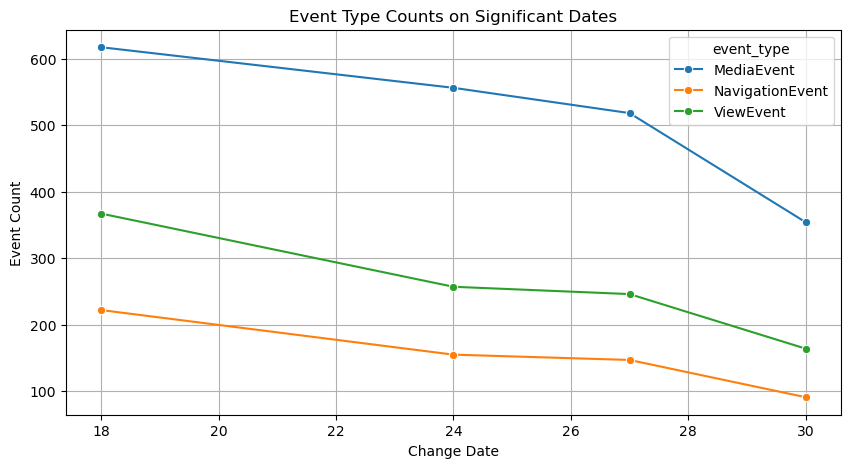

In [170]:
# 데이터프레임을 긴 형식으로 변환
melted_data = event_type_counts.reset_index().melt(
    id_vars="change_date", var_name="event_type", value_name="count"
)

# 그래프 그리기
plt.figure(figsize=(10, 5))
sns.lineplot(data=melted_data, x="change_date", y="count", hue="event_type", marker="o")

plt.xlabel("Change Date")
plt.ylabel("Event Count")
plt.title("Event Type Counts on Significant Dates")
plt.grid(True)
plt.show()

1. MediaEvent의 높은 발생 빈도:

- 모든 날짜에서 MediaEvent가 가장 높은 빈도로 발생하고 있습니다. 이는 유저들이 변화 시점에서 미디어와 관련된 행동을 많이 취하고 있음을 시사합니다. 미디어 콘텐츠에 대한 유저의 관심이 높으며, 변화가 감지될 때 미디어와의 상호작용이 증가할 가능성이 있습니다.

2. NavigationEvent의 상대적으로 낮은 빈도:

- 다른 이벤트 타입에 비해 NavigationEvent의 발생 빈도가 낮습니다. 이는 유저들이 주로 특정 페이지나 콘텐츠를 탐색하기보다는 미디어를 소비하거나 특정 콘텐츠를 조회(View)하는 데 더 집중하고 있음을 나타냅니다.
- 다만, 18일에는 NavigationEvent의 빈도가 다른 날들에 비해 높다는 점에서, 이 날짜에 유저들이 특정 탐색 활동을 더 많이 했을 가능성이 있습니다.

3. ViewEvent의 꾸준한 발생:

- ViewEvent는 변화 날짜마다 일정하게 발생하고 있으며, 이는 유저들이 특정 콘텐츠를 조회하는 행동을 지속적으로 하고 있음을 보여줍니다. MediaEvent와 함께 ViewEvent가 높다는 점은 유저들이 변화 시점에서 어떤 정보를 더 찾거나 확인하려는 경향이 있다는 것을 의미할 수 있습니다.

4. 변화 날짜별 비교:

- 18일에 가장 많은 이벤트가 발생했으며, 이후 날짜로 갈수록 이벤트 발생 빈도가 줄어드는 패턴을 보입니다. 이는 18일이 유저 변화에 있어 중요한 시점이었음을 시사할 수 있습니다. 이후 날짜로 갈수록 유저의 활동이 다소 줄어드는 양상을 보이는데, 이는 초기 변화 후 안정기에 들어갔거나 다른 요인들이 작용했을 수 있습니다.

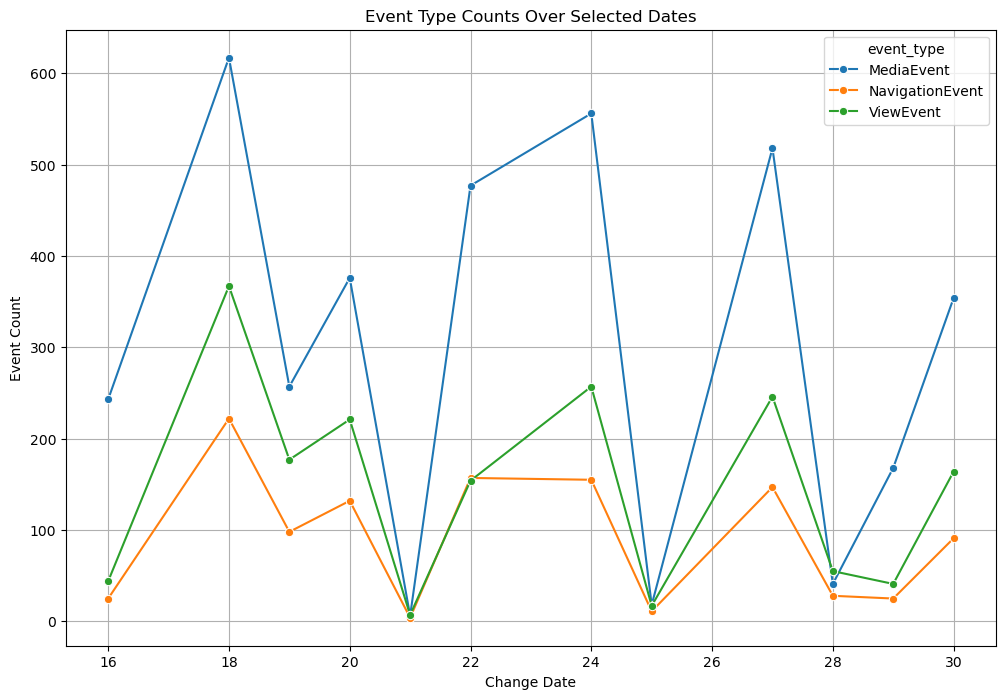

In [171]:
# 변화가 있었던 모든 날
compare_dates = [16, 18, 19, 20, 21, 22, 24, 25, 27, 28, 29, 30]

# 선택된 날짜에 대한 데이터 필터링
comparison_data = data[data["change_date"].isin(compare_dates)]

# 날짜와 이벤트 타입별로 그룹화하여 변화 양상 확인
comparison_event_type_counts = (
    comparison_data.groupby(["change_date", "event_type"]).size().unstack(fill_value=0)
)

# 데이터프레임을 긴 형식으로 변환
melted_data = comparison_event_type_counts.reset_index().melt(
    id_vars="change_date", var_name="event_type", value_name="count"
)

# 그래프 그리기
plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_data, x="change_date", y="count", hue="event_type", marker="o")

plt.xlabel("Change Date")
plt.ylabel("Event Count")
plt.title("Event Type Counts Over Selected Dates")
plt.grid(True)
plt.show()

In [172]:
# 변환 함수를 정의
def replace_hyphens(status):
    statuses = status.split(",")
    for i in range(len(statuses)):
        if statuses[i] == "-":
            if i == 0:
                statuses[i] = statuses[
                    i + 1
                ]  # 맨 앞에 -가 있는 경우, 다음 상태값으로 대체
            else:
                statuses[i] = statuses[
                    i - 1
                ]  # 중간에 -가 있는 경우, 이전 상태값으로 대체
    return ",".join(statuses)


# 데이터에 변환 함수 적용
data["memberstatus_change"] = data["memberstatus_change"].apply(replace_hyphens)

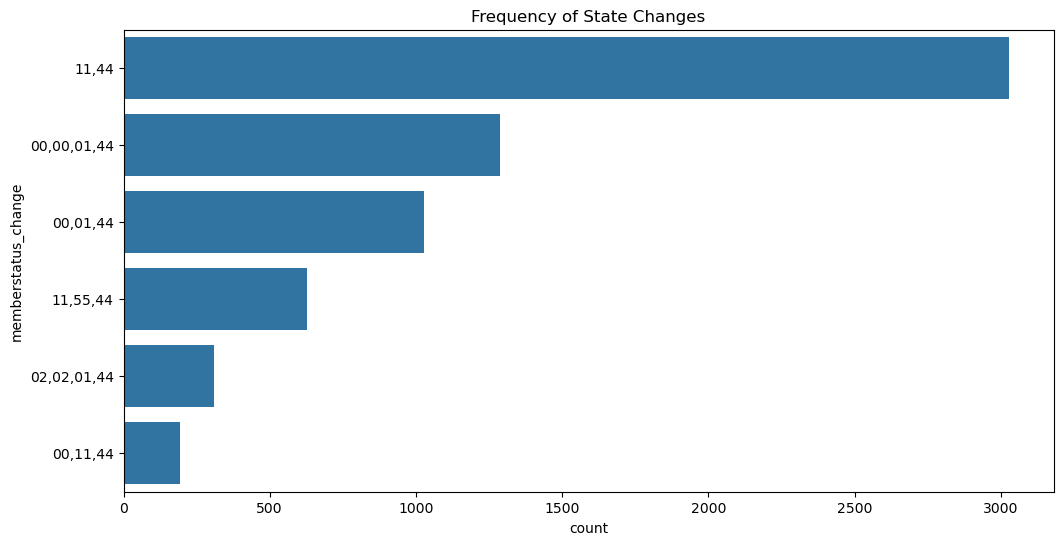

In [173]:
# 상태 값의 빈도 분석
plt.figure(figsize=(12, 6))
sns.countplot(y="memberstatus_change", data=data)
plt.title("Frequency of State Changes")
plt.show()

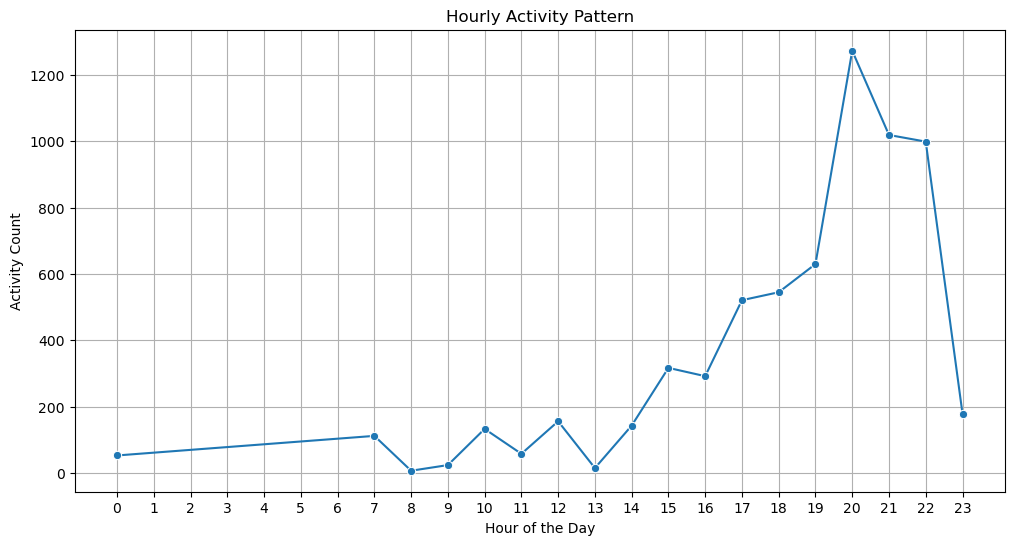

In [197]:
# timestamp 컬럼을 datetime 객체로 변환
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %I:%M:%S %p")

# 시간대별 활동 집계
data["hour"] = data["timestamp"].dt.hour
hourly_activity = data.groupby("hour").size().reset_index(name="count")

# 시간대별 활동 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="count", data=hourly_activity, marker="o")
plt.title("Hourly Activity Pattern")
plt.xlabel("Hour of the Day")
plt.ylabel("Activity Count")
plt.grid(True)
plt.xticks(range(24))  # 시간대를 0부터 23까지 모두 표시
plt.show()

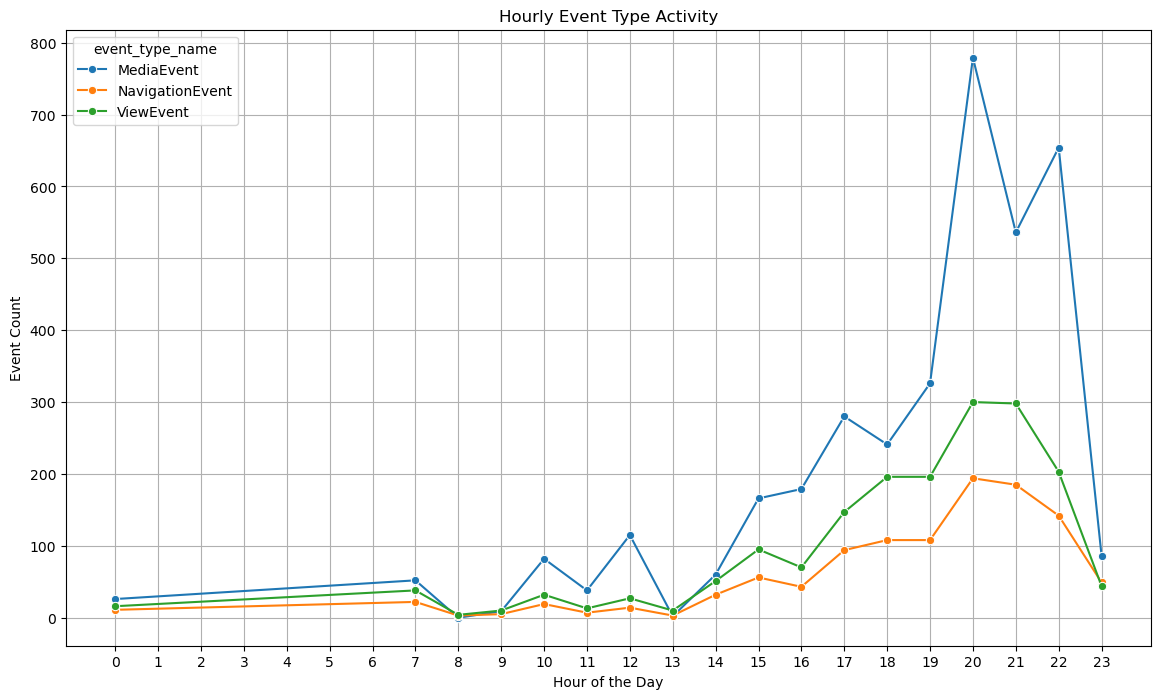

In [200]:
# event_type 값을 원래의 이름으로 매핑할 사전 생성
event_type_mapping = {0: "MediaEvent", 1: "NavigationEvent", 2: "ViewEvent"}

# event_type 열의 값을 매핑하여 새로운 열을 생성
data["event_type_name"] = data["event_type"].map(event_type_mapping)

# 시간대별 활동 집계
data["hour"] = data["timestamp"].dt.hour
hourly_activity = data.groupby(["hour", "event_type_name"]).size().unstack(fill_value=0)

# 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=hourly_activity.reset_index().melt(
        id_vars="hour", var_name="event_type_name", value_name="count"
    ),
    x="hour",
    y="count",
    hue="event_type_name",
    marker="o",
)
plt.title("Hourly Event Type Activity")
plt.xlabel("Hour of the Day")
plt.ylabel("Event Count")
plt.grid(True)
plt.xticks(range(24))
plt.show()

In [174]:
# 필수 피처와 타겟 설정
features = [
    "event_type",
    "action",
    "object_type",
]

# 타겟 컬럼
target = "memberstatus_change"

# 카테고리형 데이터를 숫자형으로 변환
le = LabelEncoder()
for col in features:
    data[col] = le.fit_transform(data[col].astype(str))

data[target] = le.fit_transform(data[target].astype(str))

# 특성과 타겟 변수
X = data[features]
y = data[target]

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [175]:
y.value_counts()

memberstatus_change
4    3029
0    1289
1    1026
5     629
3     311
2     192
Name: count, dtype: int64

In [176]:
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [177]:
# 모델 정의 및 학습
model = RandomForestClassifier(
    n_estimators=200, min_samples_leaf=2, min_samples_split=2, random_state=42
)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

In [178]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

Cross-validation scores: [0.45833333 0.47876448 0.45019305 0.51042471 0.44247104]
Mean CV score: 0.46803732303732304


In [179]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       403
           1       0.33      0.39      0.36       305
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        95
           4       0.52      0.91      0.66       909
           5       0.00      0.00      0.00       172

    accuracy                           0.49      1943
   macro avg       0.14      0.22      0.17      1943
weighted avg       0.30      0.49      0.37      1943



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [180]:
model.score(X_train, y_train)

0.48930068387381426

In [181]:
model.score(X_test, y_test)

0.48687596500257335

In [182]:
# 예측 확률을 가져오기
y_pred_proba = model.predict_proba(X_test)

# 각 클래스에 대해 ROC AUC 점수를 계산합니다.
# 'ovr'는 각 클래스별로 AUC를 계산합니다.
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.6427246112073292


In [183]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

       Feature  Importance
1       action    0.821968
2  object_type    0.130216
0   event_type    0.047816


In [206]:
# timestamp 컬럼을 datetime 객체로 변환
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d %I:%M:%S %p")

# datetime 객체에서 유용한 피처를 추출합니다.
data["year"] = data["timestamp"].dt.year
data["month"] = data["timestamp"].dt.month
data["day"] = data["timestamp"].dt.day
data["hour"] = data["timestamp"].dt.hour
data["minute"] = data["timestamp"].dt.minute
data["second"] = data["timestamp"].dt.second
data["day_of_week"] = data["timestamp"].dt.dayofweek
data["is_weekend"] = data["day_of_week"].apply(
    lambda x: 1 if x >= 5 else 0
)  # 주말 여부

In [208]:
# 필수 피처와 타겟 설정
features = [
    "event_type",
    "action",
    "object_type",
    "year",
    "month",
    "day",
    "hour",
    "minute",
    "second",
    "day_of_week",
    "is_weekend",
]

# 타겟 컬럼
target = "memberstatus_change"

# 카테고리형 데이터를 숫자형으로 변환
le = LabelEncoder()
for col in features:
    data[col] = le.fit_transform(data[col].astype(str))

data[target] = le.fit_transform(data[target].astype(str))

# 특성과 타겟 변수
X = data[features]
y = data[target]

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [209]:
# XGBoost 모델 정의
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# 모델 학습
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# 최적 모델 정의 및 학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:56:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


c:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:56:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       403
           1       0.95      0.92      0.93       305
           2       0.97      0.98      0.97        59
           3       0.95      0.84      0.89        95
           4       0.96      0.98      0.97       909
           5       0.94      0.98      0.96       172

    accuracy                           0.96      1943
   macro avg       0.96      0.95      0.95      1943
weighted avg       0.96      0.96      0.96      1943

ROC AUC Score: 0.9981228561467365
        Feature  Importance
5           day    0.276321
6          hour    0.159024
9   day_of_week    0.155208
10   is_weekend    0.140063
1        action    0.086223
7        minute    0.071243
8        second    0.044684
0    event_type    0.034449
2   object_type    0.032785
3          year    0.000000
4         month    0.000000


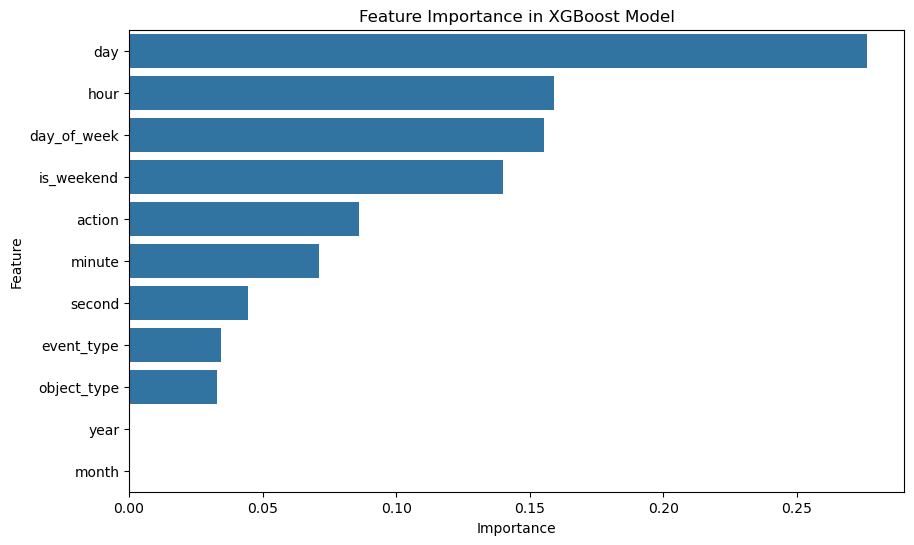

In [210]:
# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC 점수
y_pred_proba = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

# 피처 중요도
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance in XGBoost Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [214]:
best_model.score(X_train, y_train)

1.0

In [215]:
best_model.score(X_test, y_test)

0.9624292331446217

In [216]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="accuracy")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

c:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:03:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:03:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:03:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\user\anaconda3\Lib\site-packages\xgbo

Cross-validation scores: [0.4529321  0.45173745 0.403861   0.77760618 0.53436293]
Mean CV score: 0.5240999332666


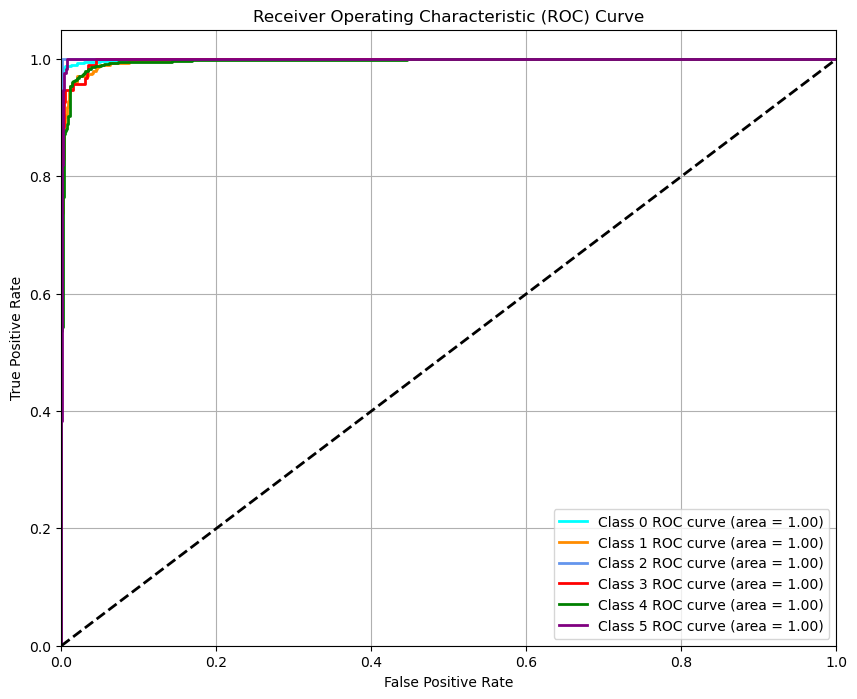

In [211]:
# 클래스 수
n_classes = len(np.unique(y))

# 각 클래스별 ROC 곡선
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# 그래프 그리기
plt.figure(figsize=(10, 8))
colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "green", "purple"])

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f"Class {i} ROC curve (area = {roc_auc[i]:0.2f})",
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()